In [18]:
%matplotlib inline
import pandas as pd
import numpy as np

In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,8,2007
1,Romans,2016
2,Ultra-Toxic,2005
3,The Candy Man,1969
4,Friends & Lovers: The Ski Trip 2,2008


In [6]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
2,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
3,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
4,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN


In [7]:
def getDecade(year):
    decade = (year // 10) * 10
    return decade

def decadeWrapper(the_row):
    return getDecade(the_row.year)

In [8]:
decTitles = titles
decTitles['decade'] = titles.apply(decadeWrapper, axis=1)
deCast = cast
deCast['decade'] = cast.apply(decadeWrapper, axis=1)

### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

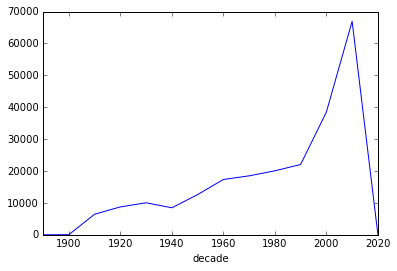

In [9]:
decTitles.groupby('decade').size().plot(kind='line')

### Use groupby() to plot the number of "Hamlet" films made each decade.

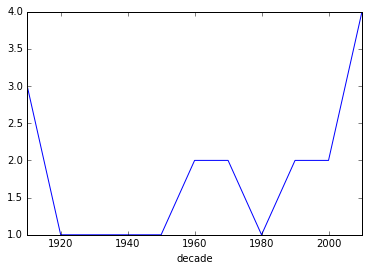

In [10]:
decTitles.query("title == 'Hamlet'").groupby('decade').size().plot(kind='line')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [11]:
deCast.query("n == 1 & decade == 1950").groupby('year').size()

year
1950     896
1951     923
1952     892
1953     952
1954     944
1955     909
1956     942
1957    1026
1958     995
1959    1024
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [20]:
pd.pivot_table(deCast.query("decade == 1950 & n >= 1 & n <= 5").groupby('year'), values='year', index='n', columns='type', aggfunc=np.count_nonzero)

AttributeError: Cannot access attribute 'columns' of 'DataFrameGroupBy' objects, try using the 'apply' method

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [13]:
cast[cast['title'].str.contains('Pink Panther')].groupby('title').size()

title
Curse of the Pink Panther          67
Revenge of the Pink Panther        64
Son of the Pink Panther            46
The Pink Panther                  108
The Pink Panther 2                 82
The Pink Panther Strikes Again     73
The Return of the Pink Panther     30
Trail of the Pink Panther          40
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [16]:
cast.query("name == 'Frank Oz'").sort_values('year').groupby('title').size()[lambda x: x>1]

title
An American Werewolf in London          2
Follow That Bird                        3
Muppet Treasure Island                  4
Muppets from Space                      4
The Adventures of Elmo in Grouchland    3
The Dark Crystal                        2
The Great Muppet Caper                  6
The Muppet Christmas Carol              7
The Muppet Movie                        8
The Muppets Take Manhattan              7
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [17]:
cast.query("name == 'Frank Oz'").groupby('character').size()[lambda x: x>=2]

character
Animal            6
Bert              3
Cookie Monster    3
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              7
dtype: int64